In [1]:
import pandas as pd
import numpy as np
!pip install mne
import mne

In [2]:
 %matplotlib qt

# New Section

Creating RawArray with float64 data, n_channels=17, n_times=31147
    Range : 0 ... 31146 =      0.000 ...   124.584 secs
Ready.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
<Info | 7 non-empty values
 bads: []
 ch_names: Channel 1, Channel 2, Channel 3, Channel 4, Channel 5, Channel ...
 chs: 8 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 8
 projs: []
 sfreq: 250.0 Hz
>
[[8.98747551e+04 8.98950505e+04 8.99215597e+04 ... 1.21203318e+05
  1.21204011e+05 1.21211007e+05]
 [6.36281745e+04 6.36515991e+04 6.36743979e+04 ... 9.83414395e+04
  9.83415959e+04 9.83472509e+04]
 [6.20115846e+04 6.20308071e+04 6.20519965e+04 ... 9.97117579e+04
  9.97071981e+04 9.97178152e+04]
 ...
 [5.10415049e+04 5.10686175e+04 5.10841296e+04 ... 8.30109814e+04
  8.30030913e+04 8.30147365e+04]
 [6.48056421e+04 6.48227858e+04 6.48545924e+04 ... 1.03286875e+05
  1.03284148e+05 1.03296084e+05]
 [2.80000000e-02 2.80000000e-02 2.80

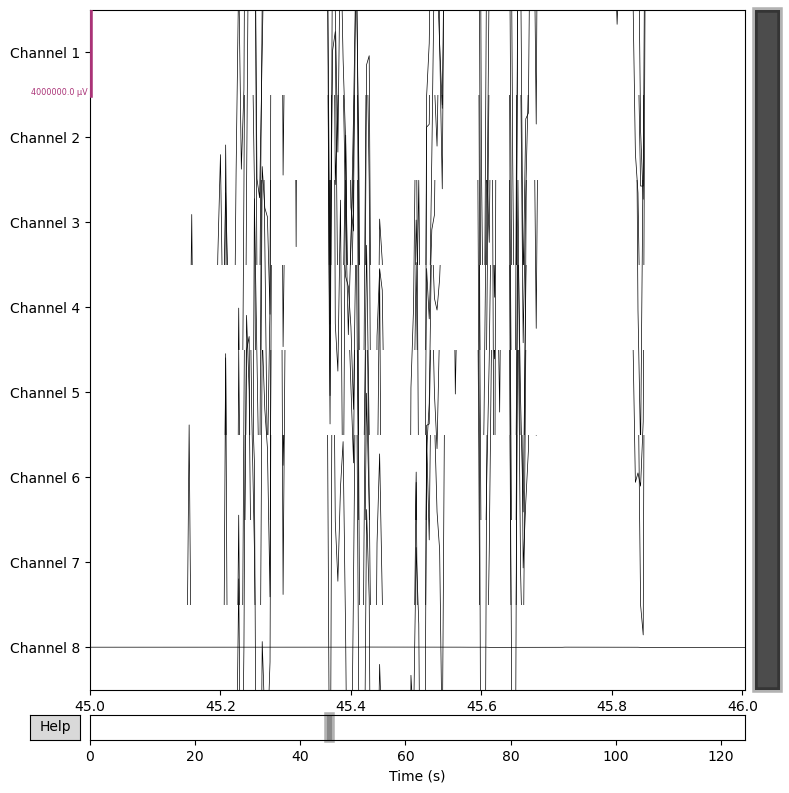

Channels marked as bad:
none


In [3]:
#### Step 1. Load data ####

# To load CSV data using pandas
csv_file_path = '../data/First_Trial_Filtered.csv'

# txt_file_path = 'First_Trial.txt'

# Load data from CSV into an array
#trial_data = np.genfromtxt(txt_file_path)

# To load txt data first load EEG into a pandas DataFrame
df = pd.read_csv(csv_file_path, delimiter=',')

# Drop rows with missing values
df = df.dropna()

# Extract EEG data
# original: trial_data = df.iloc[:, 7:24].values
trial_data = df.iloc[:, 0:17].values

# Declares channel names and types of each set of data
sfreq = 250  # sample rate in Hz
ch_names = ['Channel {}'.format(i) for i in range(trial_data.shape[1])]
ch_types = ['eeg' for i in range(trial_data.shape[1])]

# Create info structures and RawArray objects for each set of data
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
raw = mne.io.RawArray(trial_data.T, info)

# Removing irrelevant channels
ch_names = [raw.ch_names]
ch_names_to_keep = [ch_names[0][1:9]]
raw = raw.pick_channels(ch_names_to_keep[0])


# Now you can work with the MNE Raw object
print(raw.info)
print(raw.get_data())

# Plot the specified interval
# raw.plot(scalings=dict(eeg=2))
raw.plot(scalings=dict(eeg=2), start=45, duration=1)

In [4]:
#### Step 2. Filtering ####

# Apply a notch filter to remove 60 Hz line noise
raw.notch_filter(60)

raw.plot_psd(fmin=2, fmax=80);

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1651 samples (6.604 s)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
C:\Users\ethch\AppData\Local\Temp\ipykernel_22040\1027875354.py:6: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.plot_psd(fmin=2, fmax=80);
C:\Users\ethch\AppData\Local\Temp\ipykernel_22040\1027875354.py:6: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmin=2, fmax=80);


In [5]:


# Apply a bandpass filter with cutoff frequencies of Alpha waves between 8 Hz (low) and 13 Hz (high)
raw.filter(l_freq=10, h_freq=35)

raw.plot(duration=1, start=65.6, scalings='auto');
raw.plot_psd(fmin=0, fmax=60);


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 10 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 10.00
- Lower transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 8.75 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 331 samples (1.324 s)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
C:\Users\ethch\AppData\Local\Temp\ipykernel_22040\326919387.py:5: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.plot_psd(fmin=0, fmax=60);
C:\Users\ethch\AppData\Local\Temp\ipykernel_22040\326919387.py:5: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmin=0, fmax=60);


Channels marked as bad:
none


Fitting ICA to data using 8 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 0.4s.


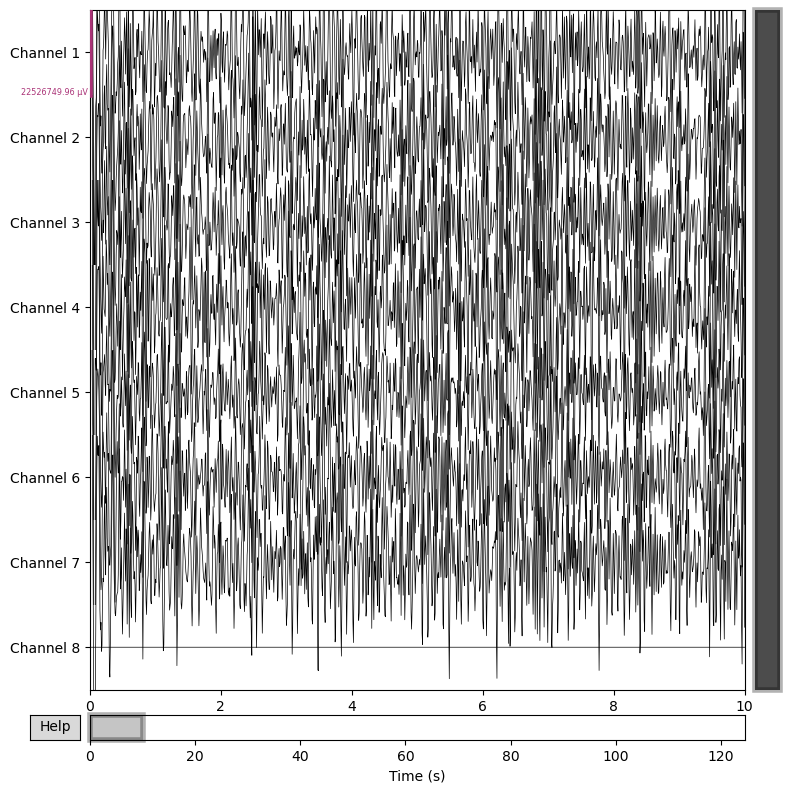

Channels marked as bad:
none


In [6]:
#### Step 3. Artifact Correction ####

from mne.preprocessing import ICA
num_components = 7 #play around with this number to get components that seem to represent the actual brain activations well
ica = ICA(n_components=num_components, method='fastica')
ica.fit(raw)

raw.plot(scalings='auto')

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


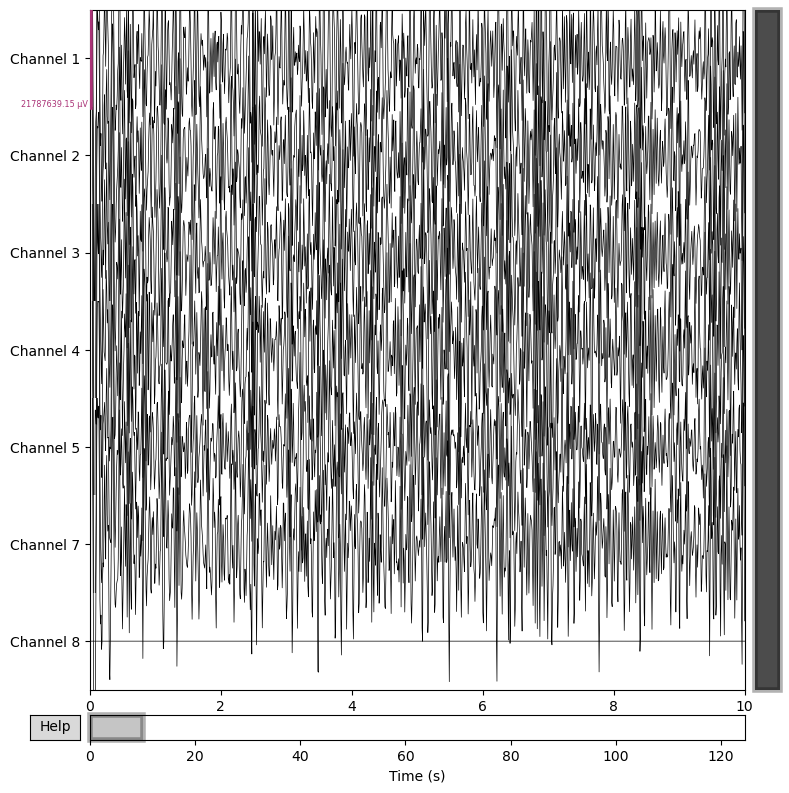

Channels marked as bad:
none


In [7]:
#### Step 4. Removing Bad Channels ####

# Mark channels as bad
bad_channels = ['Channel 6']  # List of channel names to mark as bad
raw.info['bads'] = bad_channels

# Remove bad channels from further analysis
raw.pick_types(eeg=True, exclude='bads')

# Plot the cleaned EEG data
raw.plot(scalings='auto')

In [8]:
# Define time intervals when P300 was evoked (in seconds)
p300_intervals = [(60, 63)]

# Convert time intervals to sample indices
p300_samples = [(int(start_time * sfreq), int(end_time * sfreq)) for start_time, end_time in p300_intervals]

# Create event array for MNE epochs
events = np.zeros((len(p300_samples), 3), dtype=int)
for i, (start, end) in enumerate(p300_samples):
    events[i, :] = [start, 0, 1]  # Use trigger value 1 for P300 events

# Define epoch parameters
tmin = -0.2  # Epoch start time relative to event (in seconds)
tmax = 0.8   # Epoch end time relative to event (in seconds)

# Create epochs object
epochs = mne.Epochs(raw, events, event_id=1, tmin=tmin, tmax=tmax, baseline=None, preload=True)

# Check the epoch data
print(epochs)

# Now you can further process or analyze the epochs as needed

Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
<Epochs |  1 events (all good), -0.2 – 0.8 s, baseline off, ~24 kB, data loaded,
 '1': 1>


In [8]:
# # Importing necessary libraries
# import numpy as np
# from sklearn import svm
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# # Assuming you have your P300 data stored in X and corresponding labels in y
# # X should be a numpy array of shape (number_of_samples, number_of_features)
# # y should be a numpy array of shape (number_of_samples,)

# # Splitting the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(raw, y, test_size=0.2, random_state=42)

# # Creating an SVM classifier
# classifier = svm.SVC(kernel='linear')

# # Training the classifier
# classifier.fit(X_train, y_train)

# # Making predictions on the testing set
# y_pred = classifier.predict(X_test)

# # Calculating the accuracy of the classifier
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)


NameError: name 'y' is not defined